In [99]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [124]:
forecast = pd.read_csv("forecast_starting_data.csv")
#macro = pd.read_csv("macro_data.csv")
training = pd.read_csv("training_data.csv")

/var/folders/cy/zk4z3gfd61j8bl6zhmcvx7yw0000gn/T/ipykernel_58502/3840625447.py:3: DtypeWarning:

Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.



In [62]:
#FINDING: BK AND AGE ARE LISTED IN CHARGED OFF

charged_off = training[training["charge_off"] == 1]
x = charged_off.shape
bk = charged_off.loc[charged_off["charge_off_bk"] == 1]
y = bk.shape
age = charged_off.loc[charged_off["charge_off_aged"] == 1]
z = age.shape
print(x, y, z)

(15698, 69) (1806, 69) (13892, 69)


In [63]:
training["add"] = training["closed"] + training["active"]
training.drop(["add"], axis = 1, inplace = True)


In [64]:
#POSSIBLE DATA ERROR: 38 were found to be active and closed at the same time
closed = training[training["closed"] == 0]
active = closed[closed["active"] == 0]
active.shape
closed.shape

(5758185, 69)

In [65]:
active = training[training["closed"] == 0]

### DATA CLEANING AND PROCESSING - TRAINING

In [153]:
#dropping redundencies and writeoffs because writeoffs are a post charge_off issue, thus unlikely to cause one
training.drop(["charge_off_aged", "charge_off_bk", "writeoff_type_bko", "writeoff_type_fraud_kiting", "writeoff_type_fraud_synthetic", "writeoff_type_other", "writeoff_type_aged", "writeoff_type_settlement", "writeoff_type_fraud_other", "writeoff_type_repo", "writeoff_type_null", 'writeoff_type_deceased'], axis = 1, inplace= True)
#Checking whether or not writeoffs are correct



#only two reason codes, but we don't know what they mean so uneeded for analysis(dropped)
sample = training["charge_off_reason_code"].dropna()
sample.unique()
training.drop(["charge_off_reason_code"], axis = 1, inplace = True)
training.shape



(5758223, 56)

In [154]:
def get_time(snapshot, mthcode):
    snapshot = str(snapshot)
    mthcode = str(mthcode)
    x1 = int(snapshot[0:4])
    x2 = int(snapshot[4:6])
    y1 = int(mthcode[0:4])
    y2 = int(mthcode[4:6])
    time = (y1 - x1)*(12) - x2 + y2
    return time
training['time'] = training.apply(lambda row: get_time(row['snapshot'], row['mth_code']), axis=1)
training.drop(["mth_code"], axis = 1, inplace = True)

In [155]:
#training["estimated_charge_off"] = training["aged_writeoff_amt"] + training['bankruptcy_writeoff_amt'] + training['fraud_writeoff_amt'] + training["other_writeoff_amt"]
training.drop(["total_writeoff_amt", "aged_writeoff_amt", 'bankruptcy_writeoff_amt', 'fraud_writeoff_amt', "other_writeoff_amt", "writeoff_date"], axis = 1, inplace = True)

In [156]:
# training.columns.get_loc("charge_off")
# for i in range(training_correlation.shape[1]):
#     print(training_correlation[i][20])
sample = pd.get_dummies(training["net_payment_behaviour_tripd"])
training = training.join(sample)
training.drop(["net_payment_behaviour_tripd"], axis = 1, inplace = True)
training["net_payment_behaviour_tripd"] = training["T"] + 2*training["R"] + 3*training["I"] + 4*training["P"] + 5*training["D"]


In [157]:
training.drop(["T", "R", "I", "P", "D", "C"], axis = 1, inplace = True)
training.drop(["due_balance_2", "due_balance_3", "due_balance_4", "due_balance_5", "due_balance_6", "due_balance_7", "due_balance_8"], axis = 1, inplace = True)

In [158]:
training.account_status_code.unique()

array(['I 0-6', 'I 7-12', 'A', 'I 13-24', 'I 25+', 'Recovery', 'W',
       'MonthEnd', 'Clchange'], dtype=object)

In [159]:
sample = pd.get_dummies(training["account_status_code"])
training = training.join(sample)
training["account_status_code"] = training['I 0-6'] + 2*training['I 7-12'] + 3*training['A'] + 4*training['I 13-24'] + 5*training['I 25+'] + 6*training['Recovery'] + 7*training['W'] + 8*training['MonthEnd'] + 9*training['Clchange']
training.drop(['I 0-6', 'I 7-12', 'A', 'I 13-24', 'I 25+', 'Recovery', 'W',
       'MonthEnd', 'Clchange'], axis = 1, inplace = True)

In [160]:
training.bank_fico_buckets_20.unique()

array(['581-600', '721-740', '761+', '661-680', '601-620', '701-720',
       '621-640', '561-580', '641-660', '741-760', '681-700', '<= 560',
       'Exception', 'Missing'], dtype=object)

In [161]:
sample = pd.get_dummies(training["bank_fico_buckets_20"])
training = training.join(sample)
training["bank_fico_buckets_20"] = training['581-600'] + 2*training['721-740'] + 3*training['761+'] + 4*training['661-680'] + 5*training['601-620'] + 6*training['701-720'] + 7*training['621-640'] + 8*training['561-580'] + 9*training['641-660'] + 10*training['741-760'] + 11*training['681-700'] + 12*training['<= 560'] + 13*training['Exception'] + 14 *training['Missing']
training.drop(['581-600', '721-740', '761+', '661-680', '601-620', '701-720',
       '621-640', '561-580', '641-660', '741-760', '681-700', '<= 560',
       'Exception', 'Missing'], axis = 1, inplace = True)

In [162]:
training.loc[training["charge_off"] == 1]

,financial_active,promotion_flag,variable_rate_index,account_status_code,active_12_mths,bank_fico_buckets_20,mob,open_closed_flag,ever_delinquent_flg,nbr_mths_due,...,due_account_3,due_account_4,due_account_5,due_account_6,due_account_7,due_account_8,snapshot,industry,time,net_payment_behaviour_tripd
337775,1.0,1,1,3,1.0,9,8,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,C,1,5
337776,1.0,1,0,3,1.0,12,13,1.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,A,14,4
337777,1.0,0,0,1,1.0,9,27,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,A,15,5
337778,0.0,1,0,3,1.0,7,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,C,2,5
337779,1.0,0,0,3,1.0,12,20,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,B,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5726233,1.0,1,0,3,1.0,8,56,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201911,A,1,5
5726234,1.0,0,0,3,1.0,1,230,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201911,C,1,5
5726235,1.0,0,0,3,1.0,8,60,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201911,B,1,5
5726236,1.0,1,0,3,1.0,12,121,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201911,A,1,5


In [163]:
training_correlation = training.corr()
fig = px.imshow(training_correlation, text_auto=True)
fig.show()
training_correlation["charge_off"]

financial_active               0.037885
promotion_flag                 0.022438
variable_rate_index           -0.005658
account_status_code            0.008031
active_12_mths                 0.021350
bank_fico_buckets_20           0.042081
mob                           -0.012223
open_closed_flag              -0.130344
ever_delinquent_flg            0.009611
nbr_mths_due                   0.211817
variable_rate_margin           0.010950
stmt_balance                  -0.019706
prev_balance                   0.046843
net_sales                     -0.008877
net_payments                  -0.011095
purchase_active               -0.024452
credit_limit_amt              -0.056492
credit_limit_pa               -0.017816
closed                        -0.000134
active                        -0.998789
charge_off                     1.000000
principal_amt                 -0.018662
principal_amt_chrg_off         0.606442
fee_chg_off_reversal_amt       0.683925
net_finance_charge            -0.008743


In [164]:
training_correlation["charge_off"]

financial_active               0.037885
promotion_flag                 0.022438
variable_rate_index           -0.005658
account_status_code            0.008031
active_12_mths                 0.021350
bank_fico_buckets_20           0.042081
mob                           -0.012223
open_closed_flag              -0.130344
ever_delinquent_flg            0.009611
nbr_mths_due                   0.211817
variable_rate_margin           0.010950
stmt_balance                  -0.019706
prev_balance                   0.046843
net_sales                     -0.008877
net_payments                  -0.011095
purchase_active               -0.024452
credit_limit_amt              -0.056492
credit_limit_pa               -0.017816
closed                        -0.000134
active                        -0.998789
charge_off                     1.000000
principal_amt                 -0.018662
principal_amt_chrg_off         0.606442
fee_chg_off_reversal_amt       0.683925
net_finance_charge            -0.008743


In [165]:
training.loc[training["charge_off"] == 1]

,financial_active,promotion_flag,variable_rate_index,account_status_code,active_12_mths,bank_fico_buckets_20,mob,open_closed_flag,ever_delinquent_flg,nbr_mths_due,...,due_account_3,due_account_4,due_account_5,due_account_6,due_account_7,due_account_8,snapshot,industry,time,net_payment_behaviour_tripd
337775,1.0,1,1,3,1.0,9,8,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,C,1,5
337776,1.0,1,0,3,1.0,12,13,1.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,A,14,4
337777,1.0,0,0,1,1.0,9,27,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,A,15,5
337778,0.0,1,0,3,1.0,7,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,C,2,5
337779,1.0,0,0,3,1.0,12,20,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,B,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5726233,1.0,1,0,3,1.0,8,56,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201911,A,1,5
5726234,1.0,0,0,3,1.0,1,230,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201911,C,1,5
5726235,1.0,0,0,3,1.0,8,60,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201911,B,1,5
5726236,1.0,1,0,3,1.0,12,121,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,201911,A,1,5


In [166]:
training.drop(['variable_rate_index'], axis = 1, inplace = True)

In [167]:
training.loc[training["charge_off"] == 1]

,financial_active,promotion_flag,account_status_code,active_12_mths,bank_fico_buckets_20,mob,open_closed_flag,ever_delinquent_flg,nbr_mths_due,variable_rate_margin,...,due_account_3,due_account_4,due_account_5,due_account_6,due_account_7,due_account_8,snapshot,industry,time,net_payment_behaviour_tripd
337775,1.0,1,3,1.0,9,8,1.0,0.0,2.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,C,1,5
337776,1.0,1,3,1.0,12,13,1.0,0.0,3.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,A,14,4
337777,1.0,0,1,1.0,9,27,0.0,1.0,2.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,A,15,5
337778,0.0,1,3,1.0,7,2,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,C,2,5
337779,1.0,0,3,1.0,12,20,1.0,0.0,2.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,B,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5726233,1.0,1,3,1.0,8,56,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,201911,A,1,5
5726234,1.0,0,3,1.0,1,230,0.0,0.0,2.0,19.65,...,0.0,0.0,0.0,0.0,0.0,0.0,201911,C,1,5
5726235,1.0,0,3,1.0,8,60,0.0,0.0,6.0,19.65,...,0.0,0.0,0.0,0.0,0.0,0.0,201911,B,1,5
5726236,1.0,1,3,1.0,12,121,0.0,1.0,3.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,201911,A,1,5


In [168]:
#analyzed only active account, simplify and move forward, forecasting data ONLY HAS ACTIVE ACCOUNTS ANYWAY
training.drop(["active", "closed"], axis = 1, inplace = True)

In [169]:
#changing industry names because they match another column and one hot encoding
def get_industry(industry):
    if(industry == "A"):
        return "Alpha"
    elif(industry == "B"):
        return "Beta"
    else:
        return "Chi"
training['industry'] = training["industry"].apply(lambda x: get_industry(x))

sample = pd.get_dummies(training["industry"])
training = training.join(sample)
training["industry"] = training["Alpha"] + 2*training["Beta"] + 3*training["Chi"]
training.drop(["Alpha","Beta", "Chi" ], axis = 1, inplace = True)


In [170]:
training.loc[training["charge_off"] == 1]

,financial_active,promotion_flag,account_status_code,active_12_mths,bank_fico_buckets_20,mob,open_closed_flag,ever_delinquent_flg,nbr_mths_due,variable_rate_margin,...,due_account_3,due_account_4,due_account_5,due_account_6,due_account_7,due_account_8,snapshot,industry,time,net_payment_behaviour_tripd
337775,1.0,1,3,1.0,9,8,1.0,0.0,2.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,3,1,5
337776,1.0,1,3,1.0,12,13,1.0,0.0,3.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,1,14,4
337777,1.0,0,1,1.0,9,27,0.0,1.0,2.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,1,15,5
337778,0.0,1,3,1.0,7,2,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,3,2,5
337779,1.0,0,3,1.0,12,20,1.0,0.0,2.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,201801,2,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5726233,1.0,1,3,1.0,8,56,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,201911,1,1,5
5726234,1.0,0,3,1.0,1,230,0.0,0.0,2.0,19.65,...,0.0,0.0,0.0,0.0,0.0,0.0,201911,3,1,5
5726235,1.0,0,3,1.0,8,60,0.0,0.0,6.0,19.65,...,0.0,0.0,0.0,0.0,0.0,0.0,201911,2,1,5
5726236,1.0,1,3,1.0,12,121,0.0,1.0,3.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,201911,1,1,5


In [171]:
training_correlation = training.corr()
fig = px.imshow(training_correlation, text_auto=True)
fig.show()
pd.options.display.max_rows = 4000
training_correlation["charge_off"]

financial_active               0.037885
promotion_flag                 0.022438
account_status_code            0.008031
active_12_mths                 0.021350
bank_fico_buckets_20           0.042081
mob                           -0.012223
open_closed_flag              -0.130344
ever_delinquent_flg            0.009611
nbr_mths_due                   0.211817
variable_rate_margin           0.010950
stmt_balance                  -0.019706
prev_balance                   0.046843
net_sales                     -0.008877
net_payments                  -0.011095
purchase_active               -0.024452
credit_limit_amt              -0.056492
credit_limit_pa               -0.017816
charge_off                     1.000000
principal_amt                 -0.018662
principal_amt_chrg_off         0.606442
fee_chg_off_reversal_amt       0.683925
net_finance_charge            -0.008743
non_principal_amount_gross    -0.011016
non_principal_amount_net      -0.011177
non_principal_amount_stmt     -0.010967


In [172]:
training_correlation["charge_off"].index

Index(['financial_active', 'promotion_flag', 'account_status_code',
       'active_12_mths', 'bank_fico_buckets_20', 'mob', 'open_closed_flag',
       'ever_delinquent_flg', 'nbr_mths_due', 'variable_rate_margin',
       'stmt_balance', 'prev_balance', 'net_sales', 'net_payments',
       'purchase_active', 'credit_limit_amt', 'credit_limit_pa', 'charge_off',
       'principal_amt', 'principal_amt_chrg_off', 'fee_chg_off_reversal_amt',
       'net_finance_charge', 'non_principal_amount_gross',
       'non_principal_amount_net', 'non_principal_amount_stmt', 'fc_reversals',
       'fee_reversals', 'promo_bal_amt', 'recovery_amt', 'due_account_2',
       'due_account_3', 'due_account_4', 'due_account_5', 'due_account_6',
       'due_account_7', 'due_account_8', 'snapshot', 'industry', 'time',
       'net_payment_behaviour_tripd'],
      dtype='object')

In [173]:
index_names = list(training_correlation["charge_off"].index)
remove = np.empty(0)    
for i in range(training_correlation.shape[0]):
    if(abs(training_correlation["charge_off"][i]) < 0.01):
        remove = np.append(remove, index_names[i])
print(remove)


['account_status_code' 'ever_delinquent_flg' 'net_sales'
 'net_finance_charge' 'due_account_2' 'due_account_3' 'due_account_4'
 'due_account_5' 'due_account_6' 'due_account_7' 'due_account_8'
 'snapshot' 'time']


In [174]:
remove = remove[0:11]
print(remove)

['account_status_code' 'ever_delinquent_flg' 'net_sales'
 'net_finance_charge' 'due_account_2' 'due_account_3' 'due_account_4'
 'due_account_5' 'due_account_6' 'due_account_7' 'due_account_8']


In [175]:
remove.size

11

In [176]:
for i in range(remove.size):
    training.drop(remove[i], axis = 1, inplace = True)
training.head()

,financial_active,promotion_flag,active_12_mths,bank_fico_buckets_20,mob,open_closed_flag,nbr_mths_due,variable_rate_margin,stmt_balance,prev_balance,...,non_principal_amount_net,non_principal_amount_stmt,fc_reversals,fee_reversals,promo_bal_amt,recovery_amt,snapshot,industry,time,net_payment_behaviour_tripd
0,1.0,0,1.0,1,3,1.0,0.0,NaN,34.77,1918.32,...,0.0,0.0,0.0,0.0,0.00,0.0,201801,2,6,4
1,0.0,0,1.0,2,159,1.0,0.0,19.65,0.00,0.00,...,0.0,0.0,0.0,0.0,1557.24,0.0,201801,3,17,4
2,1.0,0,1.0,3,22,1.0,0.0,19.65,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.0,201801,1,16,1
3,1.0,0,1.0,3,16,1.0,0.0,NaN,0.00,0.00,...,0.0,40.0,0.0,0.0,0.00,0.0,201801,2,5,1
4,1.0,0,0.0,2,3,1.0,2.0,11.65,0.00,0.00,...,31.0,0.0,0.0,0.0,960.00,0.0,201801,2,13,4


In [177]:
training.columns

Index(['financial_active', 'promotion_flag', 'active_12_mths',
       'bank_fico_buckets_20', 'mob', 'open_closed_flag', 'nbr_mths_due',
       'variable_rate_margin', 'stmt_balance', 'prev_balance', 'net_payments',
       'purchase_active', 'credit_limit_amt', 'credit_limit_pa', 'charge_off',
       'principal_amt', 'principal_amt_chrg_off', 'fee_chg_off_reversal_amt',
       'non_principal_amount_gross', 'non_principal_amount_net',
       'non_principal_amount_stmt', 'fc_reversals', 'fee_reversals',
       'promo_bal_amt', 'recovery_amt', 'snapshot', 'industry', 'time',
       'net_payment_behaviour_tripd'],
      dtype='object')

In [178]:
print(training.shape)
nans_per_row = training.isna().sum(axis=1)

# Count the number of rows with NaNs
num_rows_with_nans = (nans_per_row > 0).sum()

print("Number of rows with NaNs:", num_rows_with_nans)

(5758223, 29)
Number of rows with NaNs: 4208656


In [179]:
training.drop("variable_rate_margin", axis = 1, inplace = True)

In [180]:
print(training.shape)
nans_per_row = training.isna().sum(axis=1)

# Count the number of rows with NaNs
num_rows_with_nans = (nans_per_row > 0).sum()

print("Number of rows with NaNs:", num_rows_with_nans)

(5758223, 28)
Number of rows with NaNs: 4


In [181]:
nans_per_col = training.isna().sum()

# Count the number of columns with NaNs
num_cols_with_nans = (nans_per_col > 0).sum()

print("Number of columns with NaNs:", num_cols_with_nans)
nan_cols = training.columns[training.isna().any()].tolist()
print(nan_cols)

Number of columns with NaNs: 1
['open_closed_flag']


In [182]:
training.drop("open_closed_flag", axis = 1, inplace = True)

In [186]:
training.columns

Index(['financial_active', 'promotion_flag', 'active_12_mths',
       'bank_fico_buckets_20', 'mob', 'nbr_mths_due', 'stmt_balance',
       'prev_balance', 'net_payments', 'purchase_active', 'credit_limit_amt',
       'credit_limit_pa', 'charge_off', 'principal_amt',
       'principal_amt_chrg_off', 'fee_chg_off_reversal_amt',
       'non_principal_amount_gross', 'non_principal_amount_net',
       'non_principal_amount_stmt', 'fc_reversals', 'fee_reversals',
       'promo_bal_amt', 'recovery_amt', 'snapshot', 'industry', 'time',
       'net_payment_behaviour_tripd'],
      dtype='object')

In [184]:
training.to_hdf(r'training.h5', key='stage', mode='w')

In [129]:
forecast.columns

Index(['financial_active', 'net_payment_behaviour_tripd', 'promotion_flag',
       'variable_rate_index', 'account_status_code', 'active_12_mths',
       'bank_fico_buckets_20', 'mob', 'open_closed_flag',
       'ever_delinquent_flg', 'nbr_mths_due', 'variable_rate_margin',
       'stmt_balance', 'prev_balance', 'net_sales', 'net_payments',
       'purchase_active', 'credit_limit_amt', 'credit_limit_pa', 'closed',
       'active', 'charge_off', 'principal_amt', 'principal_amt_chrg_off',
       'fee_chg_off_reversal_amt', 'net_finance_charge',
       'non_principal_amount_gross', 'non_principal_amount_net',
       'non_principal_amount_stmt', 'fc_reversals', 'fee_reversals',
       'promo_bal_amt', 'recovery_amt', 'due_account_2', 'due_account_3',
       'due_account_4', 'due_account_5', 'due_account_6', 'due_account_7',
       'due_account_8', 'due_balance_2', 'due_balance_3', 'due_balance_4',
       'due_balance_5', 'due_balance_6', 'due_balance_7', 'due_balance_8',
       'snapshot',

### DATA CLEANING AND PROCESSING - FORECAST

In [293]:
#Cleaning Forecast Data

forecast['time'] = 0

forecast = forecast[['financial_active', 'promotion_flag', 'active_12_mths',
       'bank_fico_buckets_20', 'mob', 'nbr_mths_due', 'stmt_balance',
       'prev_balance', 'net_payments', 'purchase_active', 'credit_limit_amt',
       'credit_limit_pa', 'charge_off', 'principal_amt',
       'principal_amt_chrg_off', 'fee_chg_off_reversal_amt',
       'non_principal_amount_gross', 'non_principal_amount_net',
       'non_principal_amount_stmt', 'fc_reversals', 'fee_reversals',
       'promo_bal_amt', 'recovery_amt', 'snapshot', 'industry',
       'net_payment_behaviour_tripd', "time"]]

sample = pd.get_dummies(forecast["bank_fico_buckets_20"])
forecast = forecast.join(sample)
forecast["bank_fico_buckets_20"] = forecast['581-600'] + 2*forecast['721-740'] + 3*forecast['761+'] + 4*forecast['661-680'] + 5*forecast['601-620'] + 6*forecast['701-720'] + 7*forecast['621-640'] + 8*forecast['561-580'] + 9*forecast['641-660'] + 10*forecast['741-760'] + 11*forecast['681-700'] + 12*forecast['<= 560'] + 13*forecast['Exception'] + 14 *forecast['Missing']
forecast.drop(['581-600', '721-740', '761+', '661-680', '601-620', '701-720',
       '621-640', '561-580', '641-660', '741-760', '681-700', '<= 560',
       'Exception', 'Missing'], axis = 1, inplace = True)

def get_industry(industry):
    if(industry == "A"):
        return "Alpha"
    elif(industry == "B"):
        return "Beta"
    else:
        return "Chi"
    
forecast['industry'] = forecast["industry"].apply(lambda x: get_industry(x))
sample = pd.get_dummies(forecast["industry"])
forecast = forecast.join(sample)
forecast["industry"] = forecast["Alpha"] + 2*forecast["Beta"] + 3*forecast["Chi"]
forecast.drop(["Alpha","Beta", "Chi" ], axis = 1, inplace = True)

sample = pd.get_dummies(forecast["net_payment_behaviour_tripd"])
forecast = forecast.join(sample)
forecast.drop(["net_payment_behaviour_tripd"], axis = 1, inplace = True)
forecast["net_payment_behaviour_tripd"] = forecast["T"] + 2*forecast["R"] + 3*forecast["I"] + 4*forecast["P"] + 5*forecast["D"]
forecast.drop(["T", "R", "I", "P", "D", "C"], axis = 1, inplace = True)

In [294]:
forecast.dtypes
forecast['time']

0        0
1        0
2        0
3        0
4        0
        ..
19861    0
19862    0
19863    0
19864    0
19865    0
Name: time, Length: 19866, dtype: int64

In [295]:
forecast.to_hdf(r'forecast.h5', key='stage', mode='w')

### VISULALIZATION

In [107]:
def balance(df, target, percentage):
    df1 = df[df[target] == 1.0]
    df2 = df[df[target] == 0.0]
    x = np.rint((1-percentage) / percentage)
    df2 = df2.sample(len(df1) * int(x))
    return pd.concat([df1, df2])
balanced = balance(training, "charge_off", 0.10)

In [94]:
balanced = balanced.loc[balanced["snapshot"] == 201801]
balanced = balanced.sort_values("time")
x = np.arange(balanced["time"].size)
y = balanced["time"]

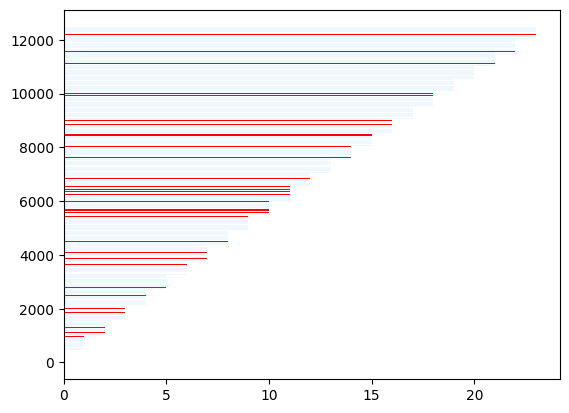

In [101]:
colors = []
for value in balanced["charge_off"]: 
    if value == 1:
        colors.append('r')
    else:
        colors.append('aliceblue')

plt.barh(x, y, color=colors)
plt.show()


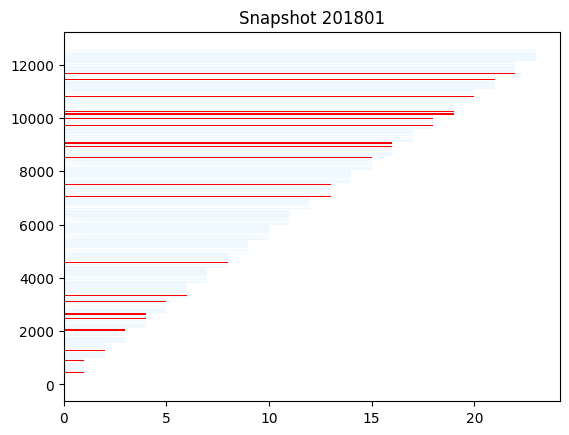

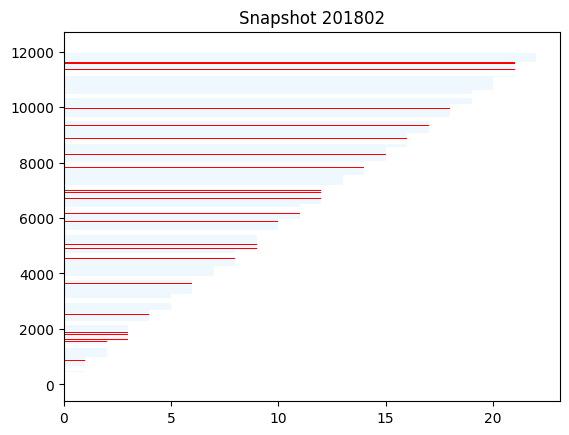

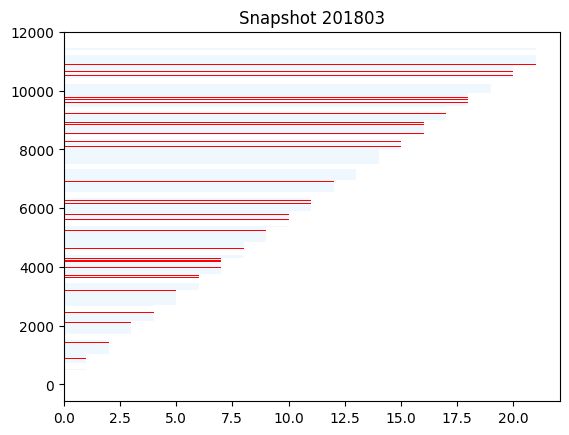

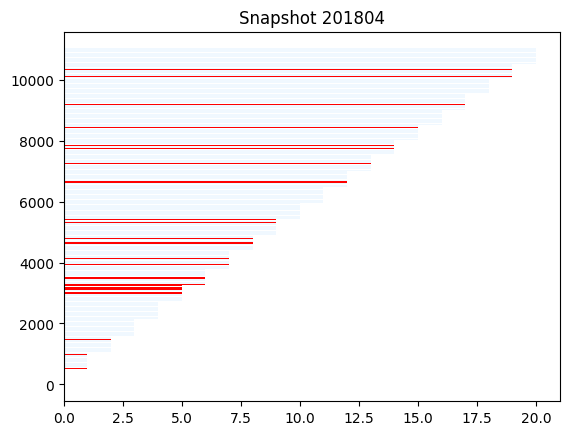

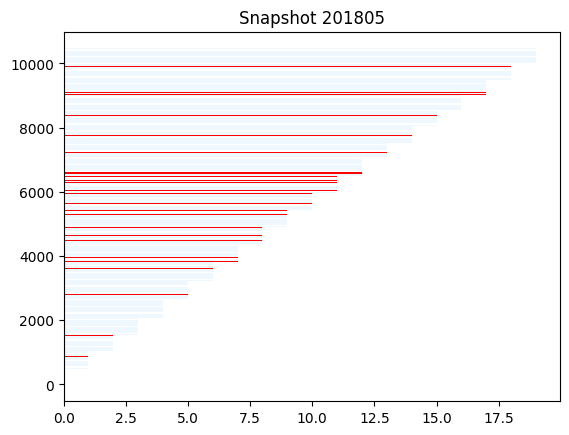

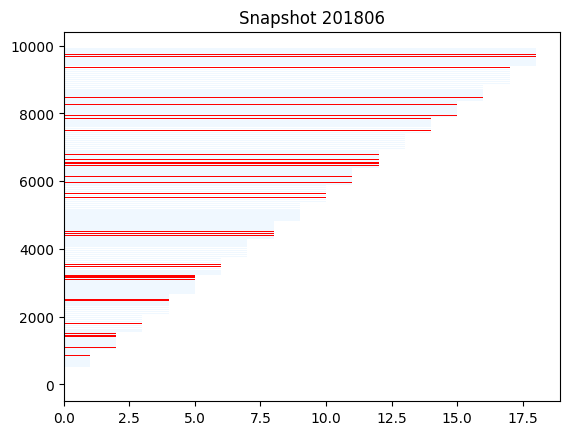

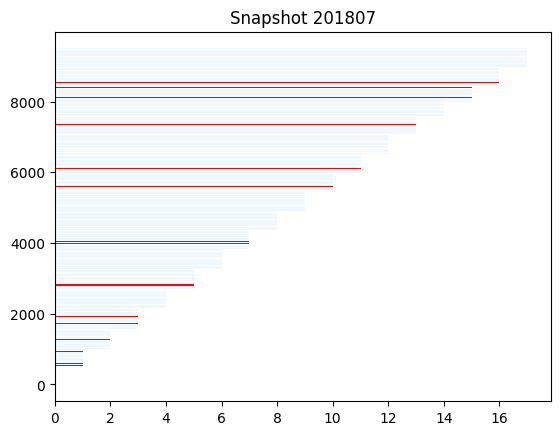

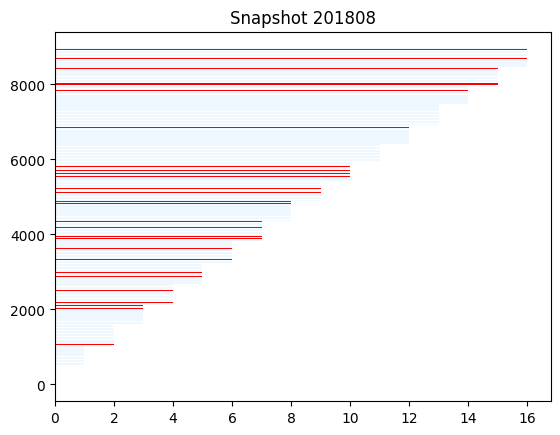

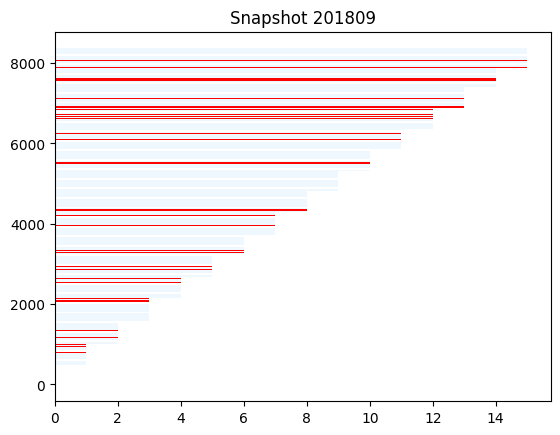

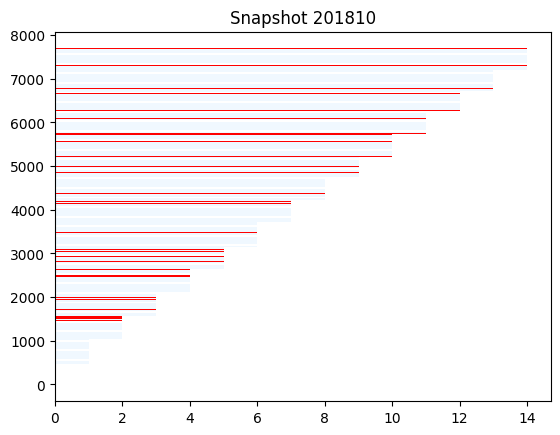

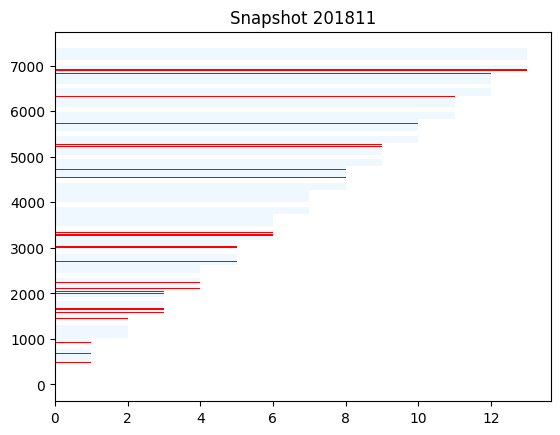

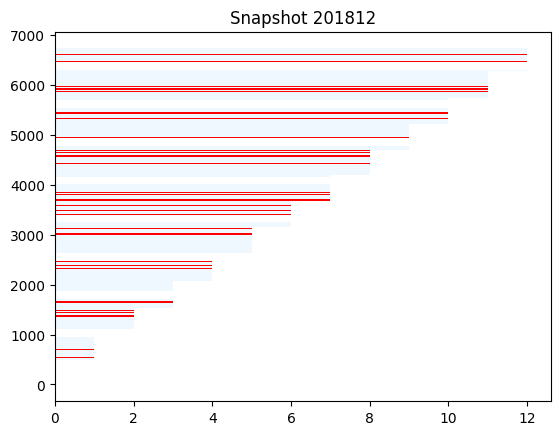

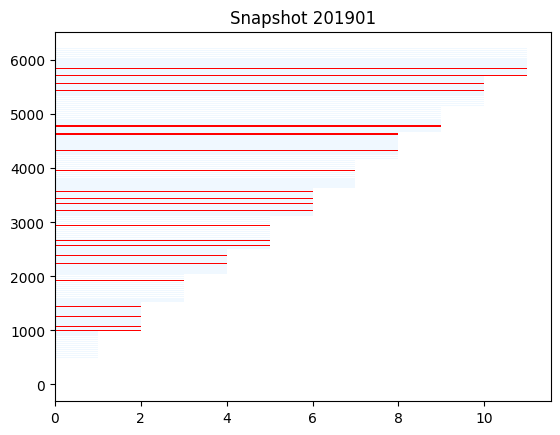

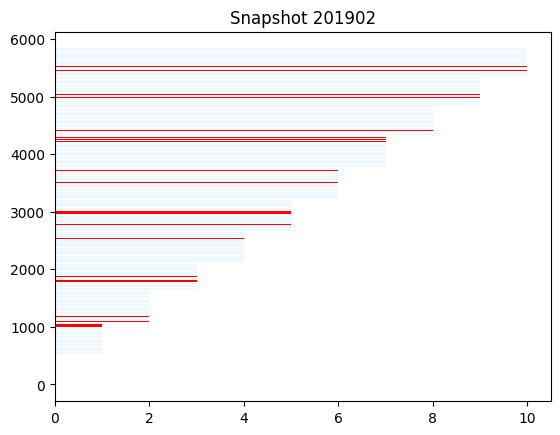

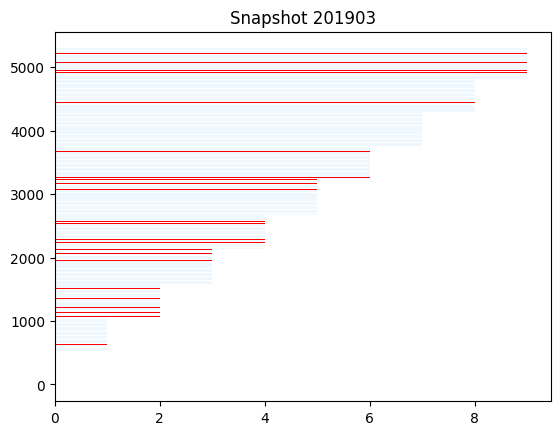

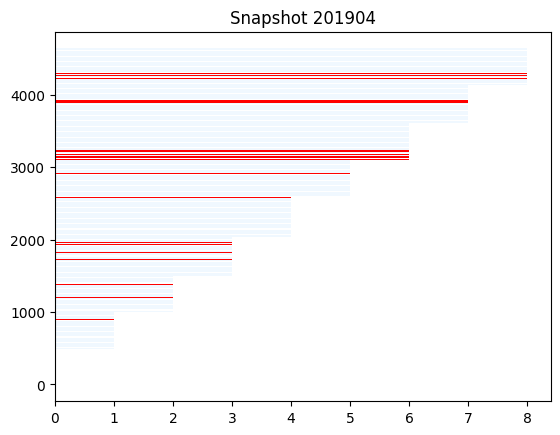

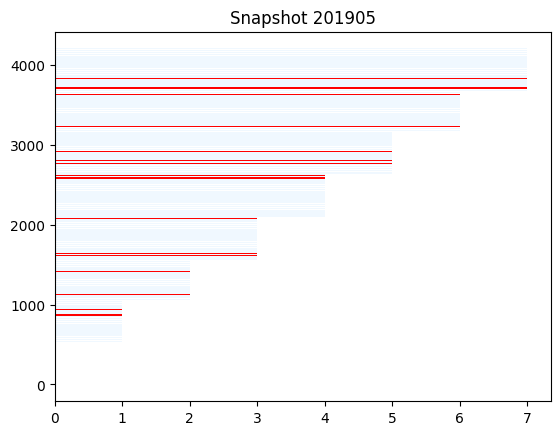

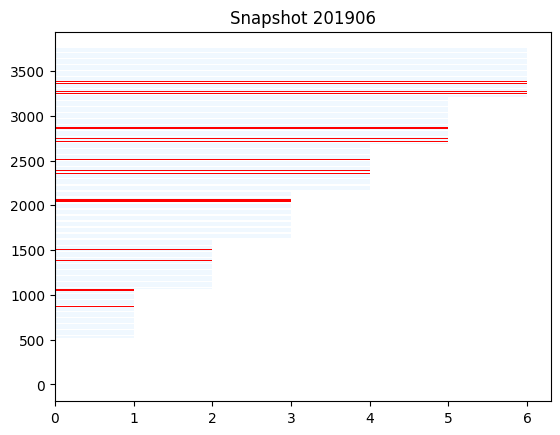

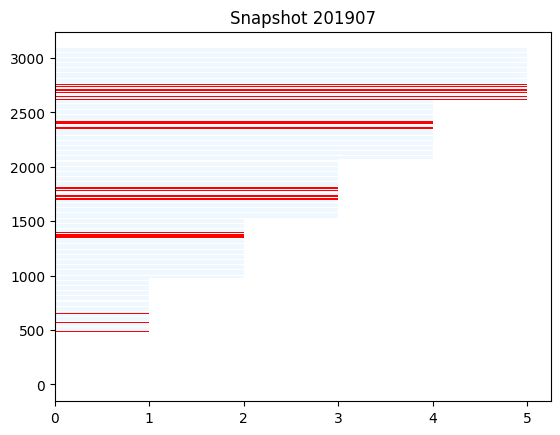

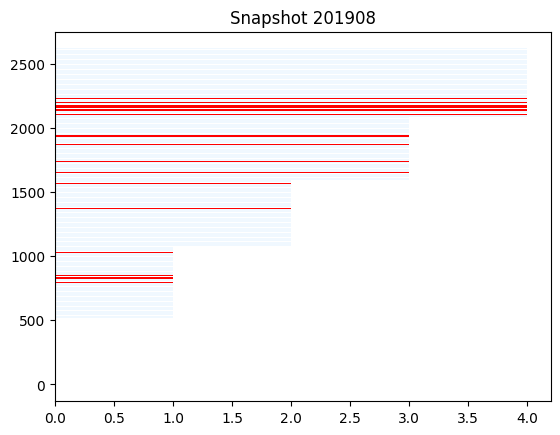

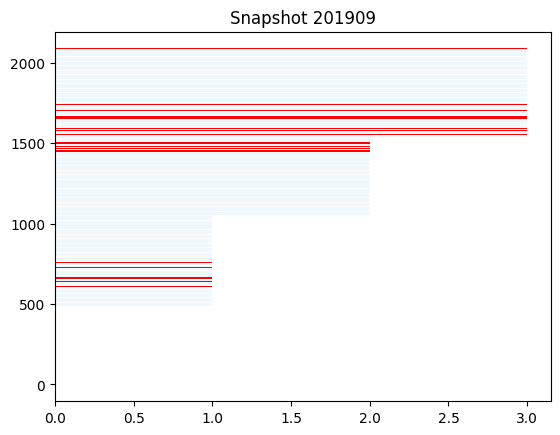

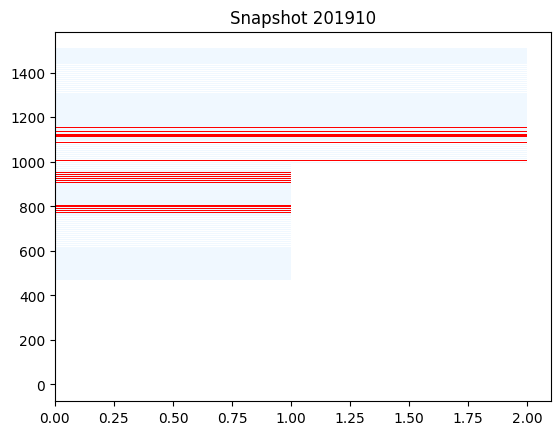

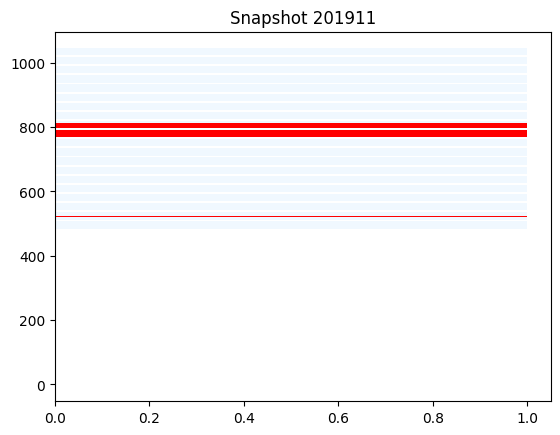

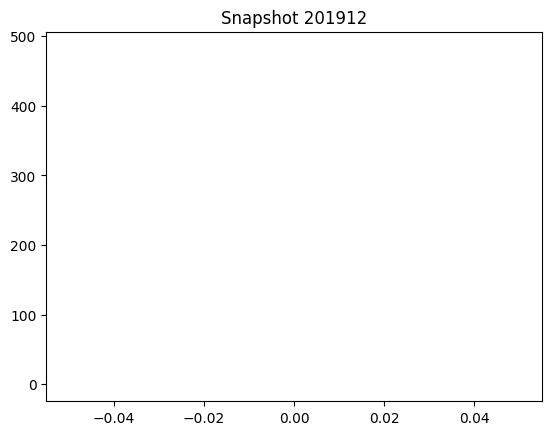

In [109]:
for i in balanced.snapshot.unique():
    z = balanced.loc[balanced["snapshot"] == i]
    z = z.sort_values("time")
    x = np.arange(z["time"].size)
    y = z["time"]
    colors = []
    for value in z["charge_off"]: 
        if value == 1:
            colors.append('r')
        else:
            colors.append('aliceblue')

    plt.barh(x, y, color=colors)
    plt.title(f"Snapshot {i}")
    plt.show()